# Expedition Attribute Distribution Analysis

This notebook analyzes the distribution of key attributes in the `base_expeditions.json` dataset. We will explore the structure, visualize distributions, and examine correlations between attributes.

## 1. Load JSON Data

We will load the expeditions data from `data/expeditions/base_expeditions.json` using Python's built-in `json` module and `pandas` for easier analysis.

In [11]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the expeditions data
with open('data/expeditions/base_expeditions.json', 'r', encoding='utf-8') as f:
    expeditions = json.load(f)

# Convert to DataFrame for easier analysis
expeditions_df = pd.DataFrame(expeditions)

# Display the number of expeditions loaded
print(f"Loaded {len(expeditions_df)} expeditions.")

Loaded 487 expeditions.


## 2. Overview of Expedition Attributes

Let's examine the structure of the dataset by displaying the available columns and a sample of the data.

In [12]:
# Show columns and a sample of the data
print("Columns in dataset:")
print(expeditions_df.columns.tolist())

# Show the first 3 rows for context
expeditions_df.head(3)

Columns in dataset:
['expedition_id', 'name', 'duration_hours', 'difficulty', 'num_favored_affinities', 'num_disfavored_affinities', 'dominant_stats', 'affinity_pools', 'encounter_pool_tags', 'encounter_id']


,expedition_id,name,duration_hours,difficulty,num_favored_affinities,num_disfavored_affinities,dominant_stats,affinity_pools,encounter_pool_tags,encounter_id
0,exp_forest_001,Scouting the Whispering Woods,4,150,6,1,"[int, spd]","{'favored': {'elemental': ['nature', 'wind'], ...","[common, forest, nature]",NaN
1,exp_urban_001,A Day at the Shopping Arcade,4,180,7,0,"[lck, spr]","{'favored': {'genre': ['Slice of Life', 'Comed...","[common, urban, social]",NaN
2,exp_magic_001,Investigating Minor Arcane Anomalies,6,350,9,1,"[mag, int, spr]","{'favored': {'archetype': ['Mage', 'Sage', 'Wi...","[common, magic, investigation]",NaN


## 3. Distribution of Expedition Duration

Let's visualize the distribution of the `duration_hours` attribute across all expeditions.

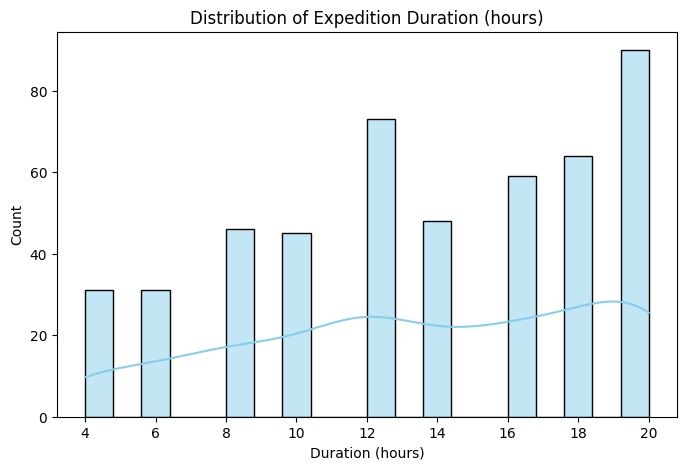

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(expeditions_df['duration_hours'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Expedition Duration (hours)')
plt.xlabel('Duration (hours)')
plt.ylabel('Count')
plt.show()

## 4. Distribution of Expedition Difficulty

Now, let's visualize the distribution of the `difficulty` attribute.

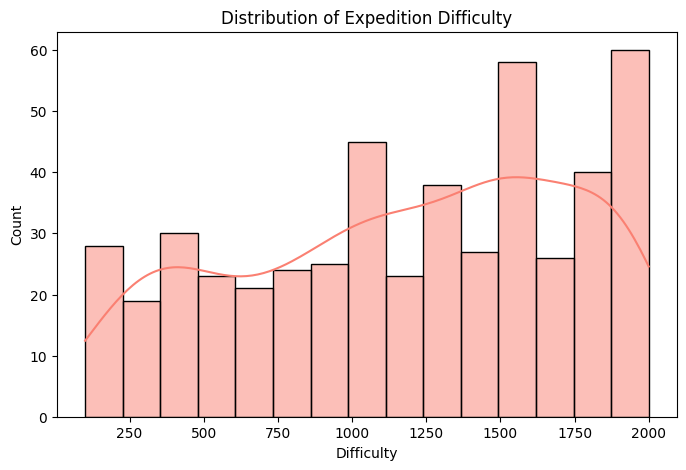

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(expeditions_df['difficulty'], bins=15, kde=True, color='salmon')
plt.title('Distribution of Expedition Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Count')
plt.show()

## 5. Distribution of Number of Favored and Disfavored Affinities

Let's analyze the distributions of `num_favored_affinities` and `num_disfavored_affinities`.

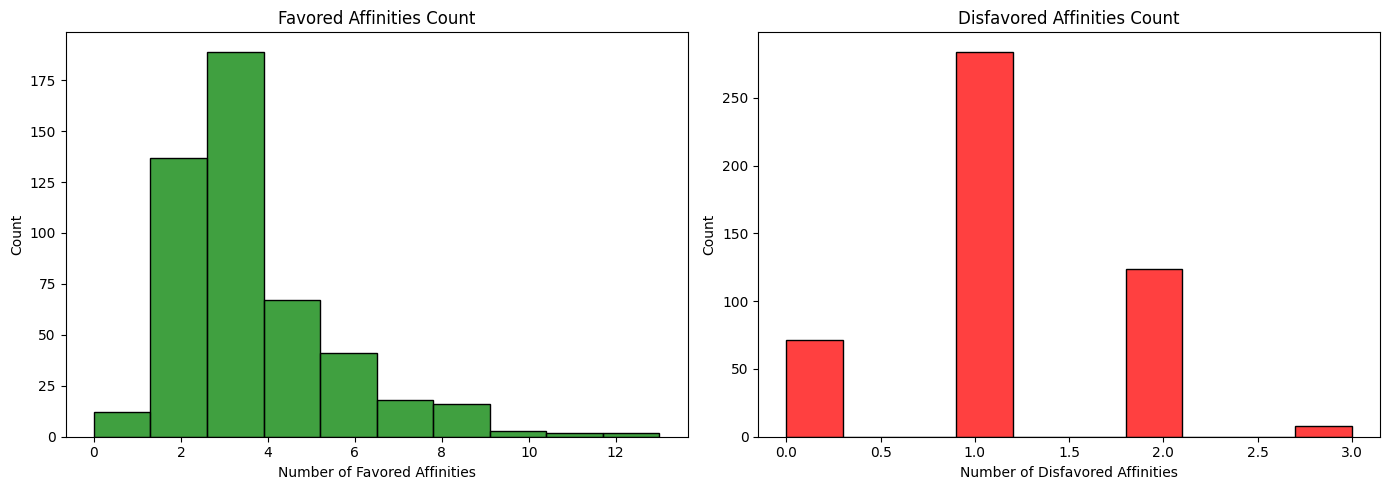

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(expeditions_df['num_favored_affinities'], bins=10, ax=axes[0], color='green')
axes[0].set_title('Favored Affinities Count')
axes[0].set_xlabel('Number of Favored Affinities')
axes[0].set_ylabel('Count')

sns.histplot(expeditions_df['num_disfavored_affinities'], bins=10, ax=axes[1], color='red')
axes[1].set_title('Disfavored Affinities Count')
axes[1].set_xlabel('Number of Disfavored Affinities')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## 6. Distribution of Dominant Stats

Let's aggregate and plot the frequency of each stat appearing in the `dominant_stats` field across all expeditions.

C:\Users\tungv\AppData\Local\Temp\ipykernel_22452\1664075478.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(stat_counts.keys()), y=list(stat_counts.values()), palette='viridis')


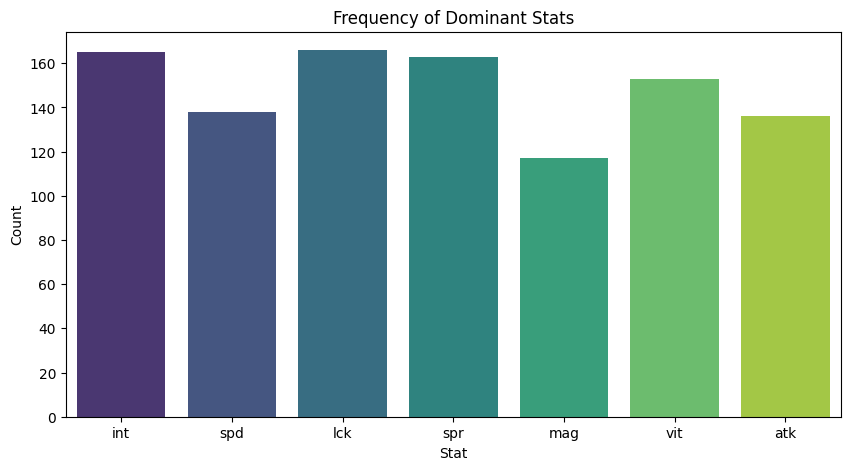

In [16]:
# Flatten and count dominant stats
all_stats = []
for stats in expeditions_df['dominant_stats']:
    if isinstance(stats, list):
        all_stats.extend(stats)
    elif pd.notnull(stats):
        all_stats.append(stats)

stat_counts = Counter(all_stats)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(stat_counts.keys()), y=list(stat_counts.values()), palette='viridis')
plt.title('Frequency of Dominant Stats')
plt.xlabel('Stat')
plt.ylabel('Count')
plt.show()

## 7. Distribution of Encounter Pool Tags

Aggregate and plot the frequency of each tag in the `encounter_pool_tags` field across all expeditions.

C:\Users\tungv\AppData\Local\Temp\ipykernel_22452\4228873793.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tag_counts.keys()), y=list(tag_counts.values()), palette='mako')


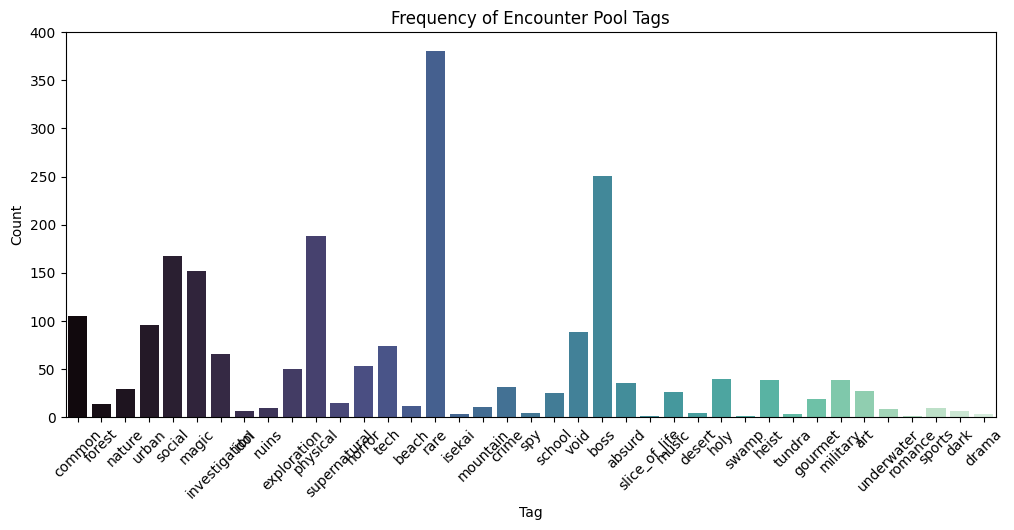

In [17]:
# Flatten and count encounter pool tags
all_tags = []
for tags in expeditions_df['encounter_pool_tags']:
    if isinstance(tags, list):
        all_tags.extend(tags)
    elif pd.notnull(tags):
        all_tags.append(tags)

tag_counts = Counter(all_tags)

plt.figure(figsize=(12, 5))
sns.barplot(x=list(tag_counts.keys()), y=list(tag_counts.values()), palette='mako')
plt.title('Frequency of Encounter Pool Tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 8. Correlation Analysis Between Attributes

Let's compute and visualize the correlations between numeric attributes such as duration, difficulty, and affinity counts.

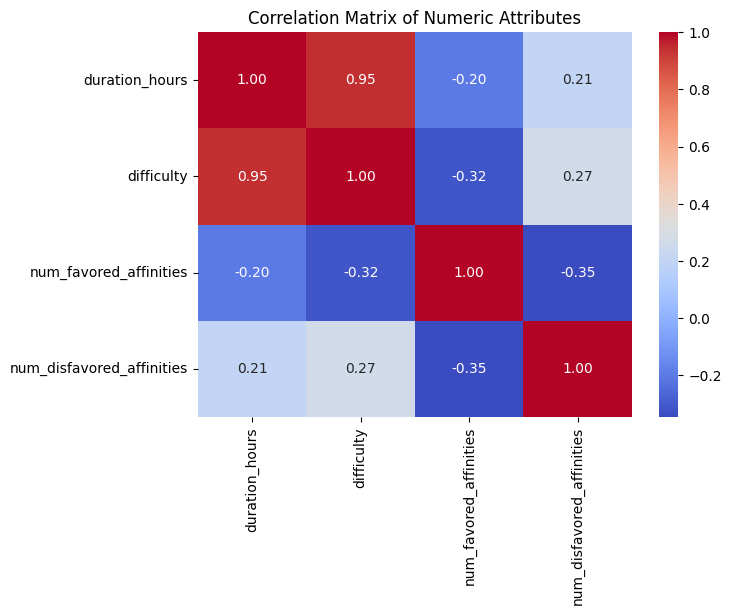

In [18]:
# Select relevant numeric columns
numeric_cols = ['duration_hours', 'difficulty', 'num_favored_affinities', 'num_disfavored_affinities']

corr = expeditions_df[numeric_cols].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Attributes')
plt.show()

## 9. Analysis of Favored Affinities

Let's analyze the favored affinities across all expeditions. We'll aggregate the values for each affinity type (elemental, archetype, genre, series_id) and visualize their distributions.

C:\Users\tungv\AppData\Local\Temp\ipykernel_22452\953312868.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='crest')


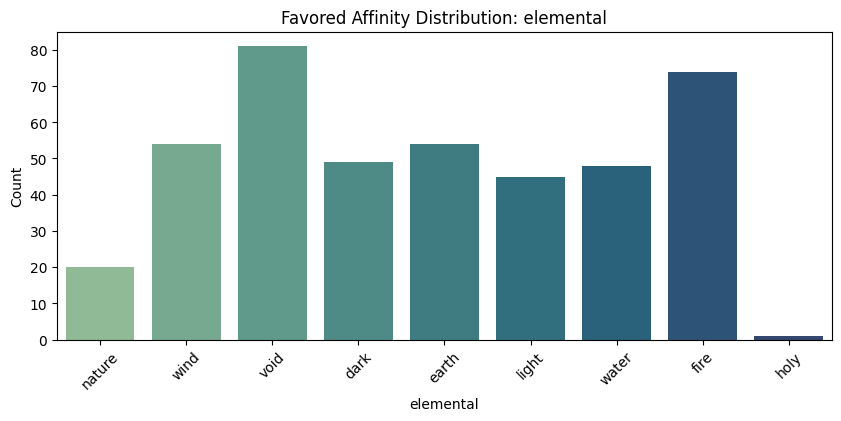

C:\Users\tungv\AppData\Local\Temp\ipykernel_22452\953312868.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='crest')


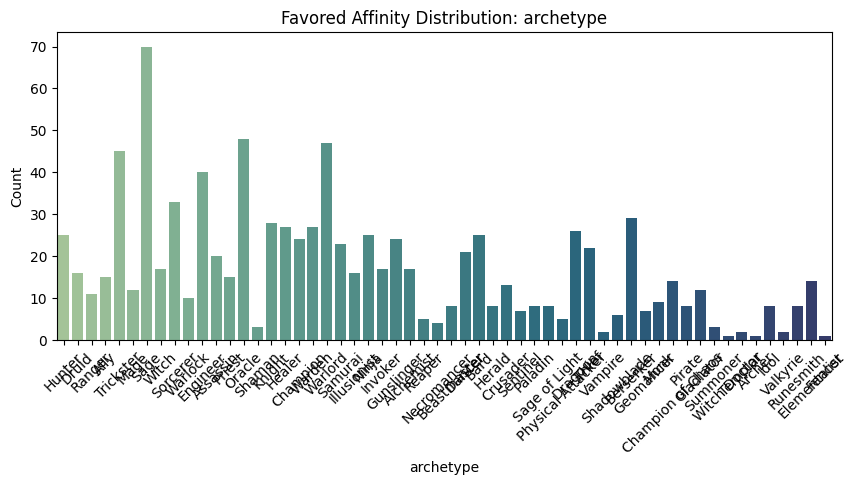

C:\Users\tungv\AppData\Local\Temp\ipykernel_22452\953312868.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='crest')


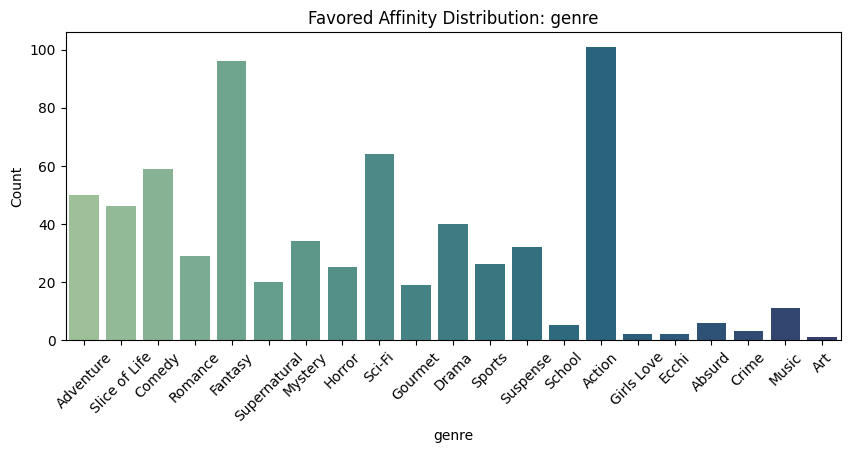

C:\Users\tungv\AppData\Local\Temp\ipykernel_22452\953312868.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='crest')


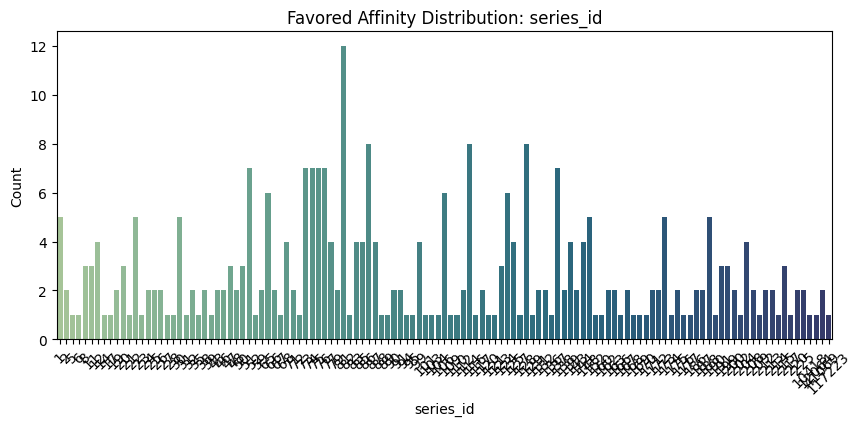

In [19]:
# Aggregate favored affinities by type
from collections import defaultdict

favored_affinities = defaultdict(list)
for exp in expeditions:
    pools = exp.get('affinity_pools', {}).get('favored', {})
    for key, values in pools.items():
        if isinstance(values, list):
            favored_affinities[key].extend(values)
        elif pd.notnull(values):
            favored_affinities[key].append(values)

# Count and plot each affinity type
for affinity_type, values in favored_affinities.items():
    if not values:
        continue
    counts = Counter(values)
    plt.figure(figsize=(10, 4))
    sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='crest')
    plt.title(f'Favored Affinity Distribution: {affinity_type}')
    plt.xlabel(affinity_type)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## 10. Distribution of Dominant Stat Combinations

Now let's analyze the distribution of the *combinations* of dominant stats (as lists/tuples) for each expedition. This will show which stat sets are most common as a group, not just individually.

C:\Users\tungv\AppData\Local\Temp\ipykernel_22452\3322471814.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='flare')


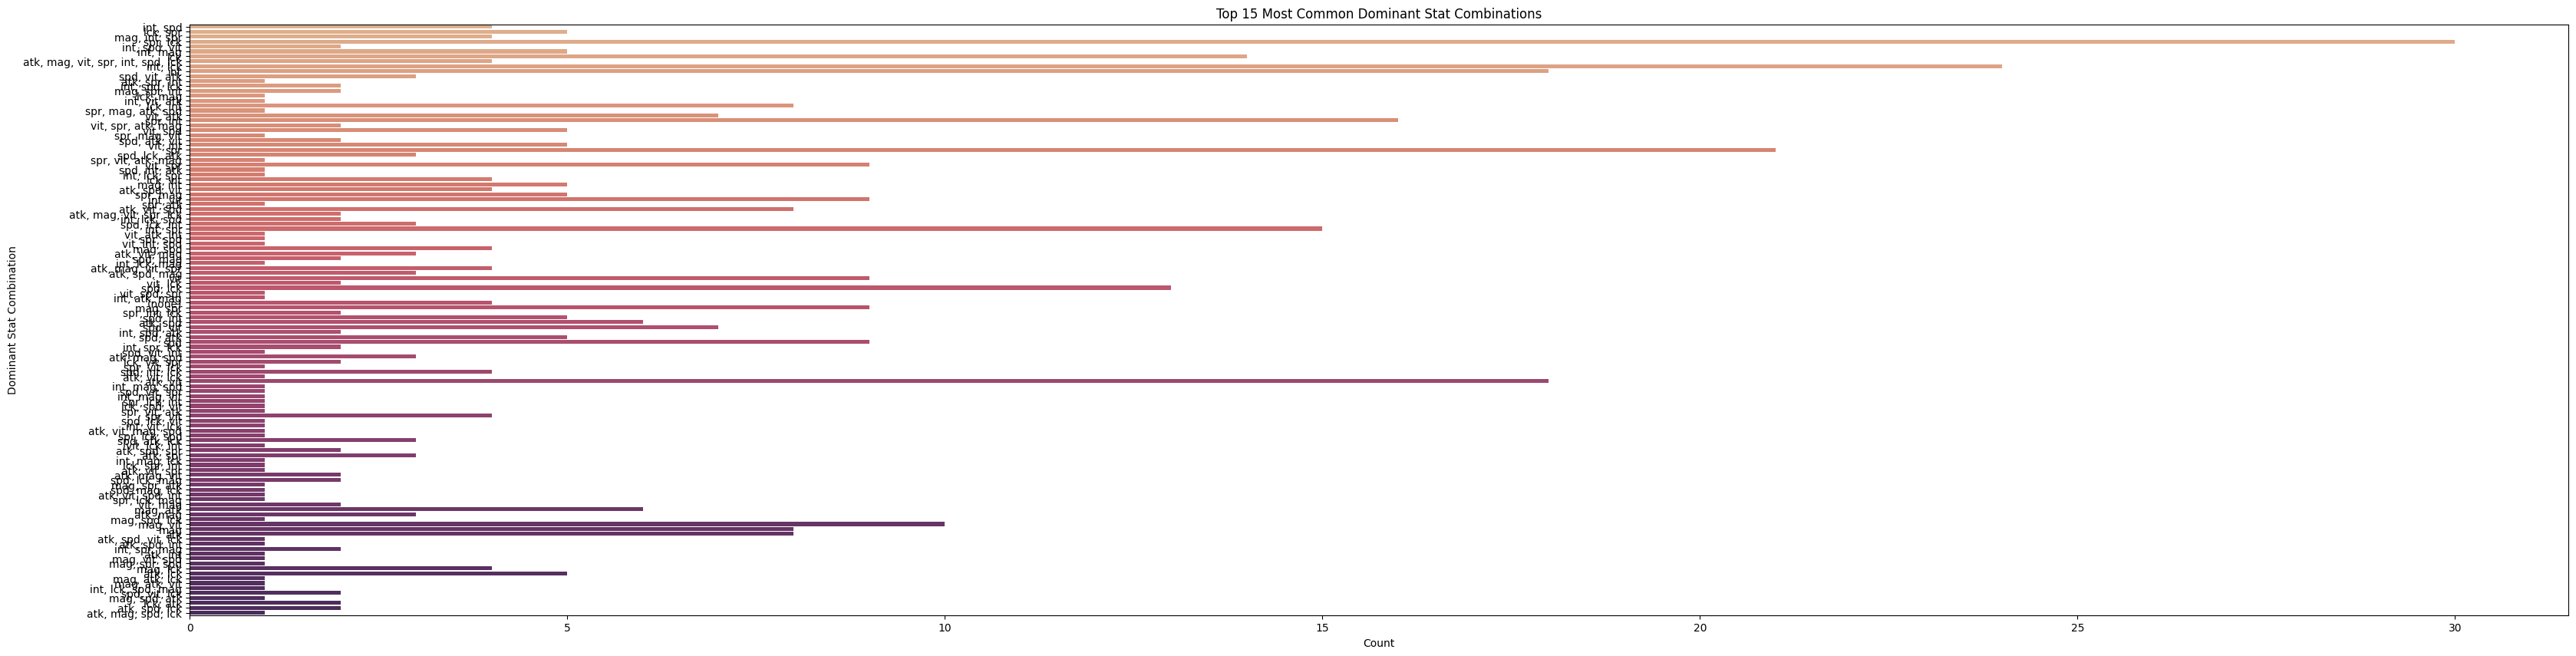

In [20]:
# Count the frequency of each dominant stat combination (as tuple)
dominant_combos = []
for stats in expeditions_df['dominant_stats']:
    if isinstance(stats, list):
        dominant_combos.append(tuple(stats))
    elif pd.notnull(stats):
        dominant_combos.append((stats,))
    else:
        dominant_combos.append(())

combo_counts = Counter(dominant_combos)

# Show the top 15 most common combinations
all_combo = list(combo_counts.items())

plt.figure(figsize=(40, 10))
labels = [', '.join(combo) if combo else '(none)' for combo, _ in all_combo]
counts = [count for _, count in all_combo]
sns.barplot(x=counts, y=labels, palette='flare')
plt.title('Top 15 Most Common Dominant Stat Combinations')
plt.xlabel('Count')
plt.ylabel('Dominant Stat Combination')
plt.show()